## Week 2. Lab Code

In [1]:
import scipy
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom
from scipy.stats import gamma

# Likelihood of poisson
def likelihood(theta, n, sy):
    return (theta**sy)*np.exp(-n*theta)

# prior parameters for theta ~ gamma(a,b)
a = 2
b = 1
prior = st.gamma(a, scale= 1/b)

# data in group A(no bachelor's) and posterior distribution
# n = number of observed women, sy = sum of their numbers of children
nA = 111
syA = 217
postA = st.gamma(a+syA, scale=1/(b+nA))

# data in group B(bachelor's) and posterior distribution
nB = 44
syB = 66
postB = st.gamma(a+syB, scale=1/(b+nB))

#### Group A Bayesian Analysis

In [2]:
# posterior mean (Group A)
(a+syA)/(b+nA)

1.9553571428571428

In [3]:
# posterior mode (Group A)
(a+syA-1)/(b+nA)

1.9464285714285714

In [4]:
# posterior 95% CI (Group A)
# upper and lower bounds
lbA = gamma.ppf(0.025, a+syA, scale = 1/(b+nA))
ubA = gamma.ppf(0.975, a+syA, scale = 1/(b+nA))
(lbA, ubA)

(1.7049431489418194, 2.2226790202451725)

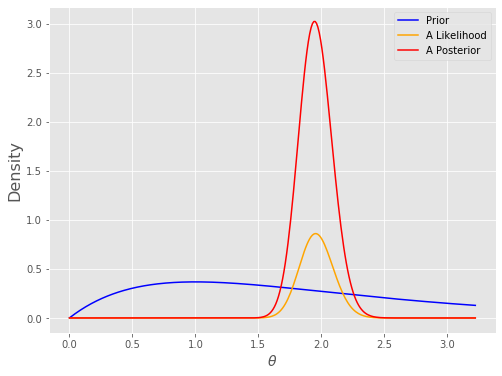

In [5]:
thetas = np.linspace(0.001, ubA+1, 300)
plt.figure(figsize=(8,6))
plt.style.use('ggplot')
plt.plot(thetas, prior.pdf(thetas), label='Prior', c='blue')

# 시각화를 위해 likelihood 함수에 임의의 상수를 곱함
plt.plot(thetas, (10**31)*likelihood(thetas, nA, syA), label='A Likelihood', c='orange')
plt.plot(thetas, postA.pdf(thetas), label='A Posterior', c='red')
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.legend();

#### Group B Bayesian Analysis

In [6]:
# posterior mean (Group B)
(a+syB)/(b+nB)

1.511111111111111

In [7]:
# posterior mode (Group B)
(a+syB-1)/(b+nB)

1.488888888888889

In [8]:
# posterior 95% CI (Group B)
# upper and lower bounds
lbB = gamma.ppf(0.025, a+syB, scale=1/(b+nB))
ubB = gamma.ppf(0.975, a+syB, scale=1/(b+nB))
(lbB, ubB)

(1.1734369056138325, 1.8908362583954745)

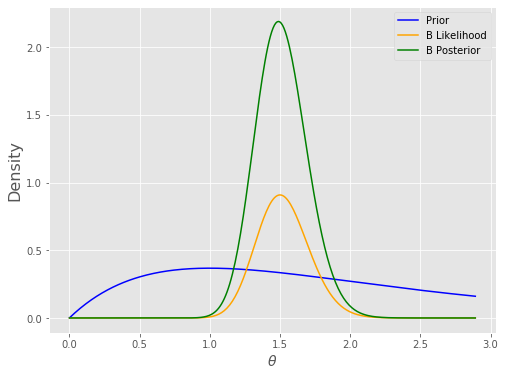

In [9]:
thetas = np.linspace(0.001, ubB+1, 300)
plt.figure(figsize=(8,6))
plt.style.use('ggplot')
plt.plot(thetas, prior.pdf(thetas), label='Prior', c='blue')
# 시각화를 위해 likelihood 함수에 임의의 상수를 곱함
plt.plot(thetas, (10**17)*likelihood(thetas, nB, syB), label='B Likelihood', c='orange')
plt.plot(thetas, postB.pdf(thetas), label='B Posterior', color='green')

plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.legend();

#### Comparing Two Posterior Distributions

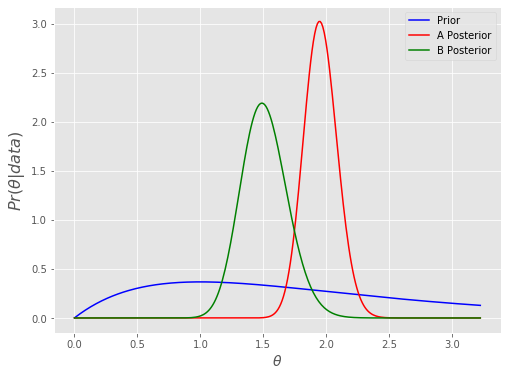

In [10]:
thetas = np.linspace(0.001, ubA+1, 300)
plt.figure(figsize=(8,6))
plt.style.use('ggplot')
plt.plot(thetas, prior.pdf(thetas), label='Prior', c='blue')
plt.plot(thetas, postA.pdf(thetas), label='A Posterior', c='red')
plt.plot(thetas, postB.pdf(thetas), label='B Posterior', c='green')
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel(r'$Pr(\theta|data)$', fontsize=16)
plt.legend();

#### Posterior Predictive Distributions for number of children

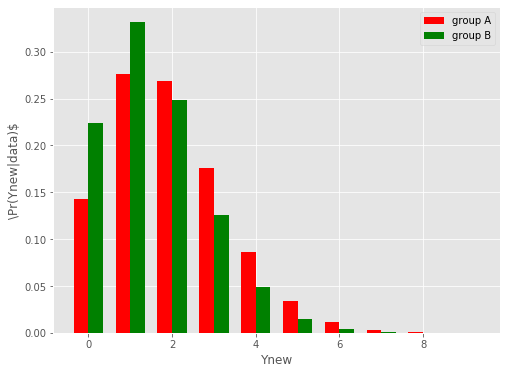

In [11]:
ynew = np.arange(10)
postpredA = st.nbinom.pmf(ynew, a+syA, (b+nA)/(b+nA+1))
postpredB = st.nbinom.pmf(ynew, a+syB, (b+nB)/(b+nB+1))
width = 0.35   # the width of the bars
plt.figure(figsize=(8,6))
plt.bar(ynew - width/2, postpredA, width, label='group A', color='red')
plt.bar(ynew + width/2, postpredB, width, label='group B', color='green')
plt.xlabel('Ynew')
plt.ylabel(r'\Pr(Ynew|data)$')
plt.legend()
plt.show()

## HW
### 1.a)

In [12]:
syA = sum([12,9,12,14,13,13,15,8,15,6])
nA = 10

syB = sum([11,11,10,9,9,8,7,10,6,8,8,9,7])
nB = 13

In [13]:
# prior parameters for theta ~ gamma(a,1/b)
aA = 120
bA = 10
priorA = st.gamma(aA, scale= 1/bA)

aB = 12
bB = 1
priorB = st.gamma(aB, scale= 1/bB)

In [14]:
# posterior ~ gamma(a+sy,1/(b+n))
posteriorA = st.gamma(aA+syA, 1/(bA+nA))

posteriorB = st.gamma(aB+syB, 1/(bB+nB))

#### Group A Posterior

In [15]:
# posterior mean (Group A)
(aA+syA)/(bA+nA)

11.85

In [16]:
# posterior variance (Group A)
(aA+syA)/((bA+nA)**2)

0.5925

In [17]:
# posterior 95% CI (Group A)
# upper and lower bounds
lbA = gamma.ppf(0.025, aA+syA, scale=1/(bA+nA))
ubA = gamma.ppf(0.975, aA+syA, scale=1/(bA+nA))
(lbA, ubA)

(10.389238190941795, 13.405448325642006)

#### Group B Posterior

In [18]:
# posterior mean (Group B)
(aB+syB)/(bB+nB)

8.928571428571429

In [19]:
# posterior variance (Group B)
(aB+syB)/((bB+nB)**2)

0.6377551020408163

In [20]:
# posterior 95% CI (Group B)
# upper and lower bounds
lbB = gamma.ppf(0.025, aB+syB, scale=1/(bB+nB))
ubB = gamma.ppf(0.975, aB+syB, scale=1/(bB+nB))
(lbB, ubB)

(7.432064219464302, 10.560308149242363)

### 1.b)

In [21]:
mean = [0]
mean = mean*50
for i in range(50):
    mean[i] = (12*(i+1)+syB)/(i+1+nB)

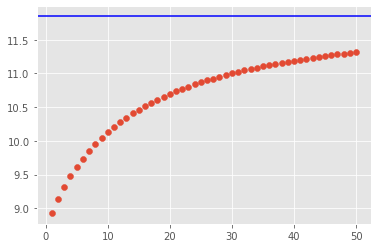

In [22]:
plt.scatter(range(1,51),mean)
plt.axhline(y=(aA+syA)/(bA+nA), color = 'blue')

### 1.c)

독립인 것 같다

### 2

In [58]:
from IPython.display import Image

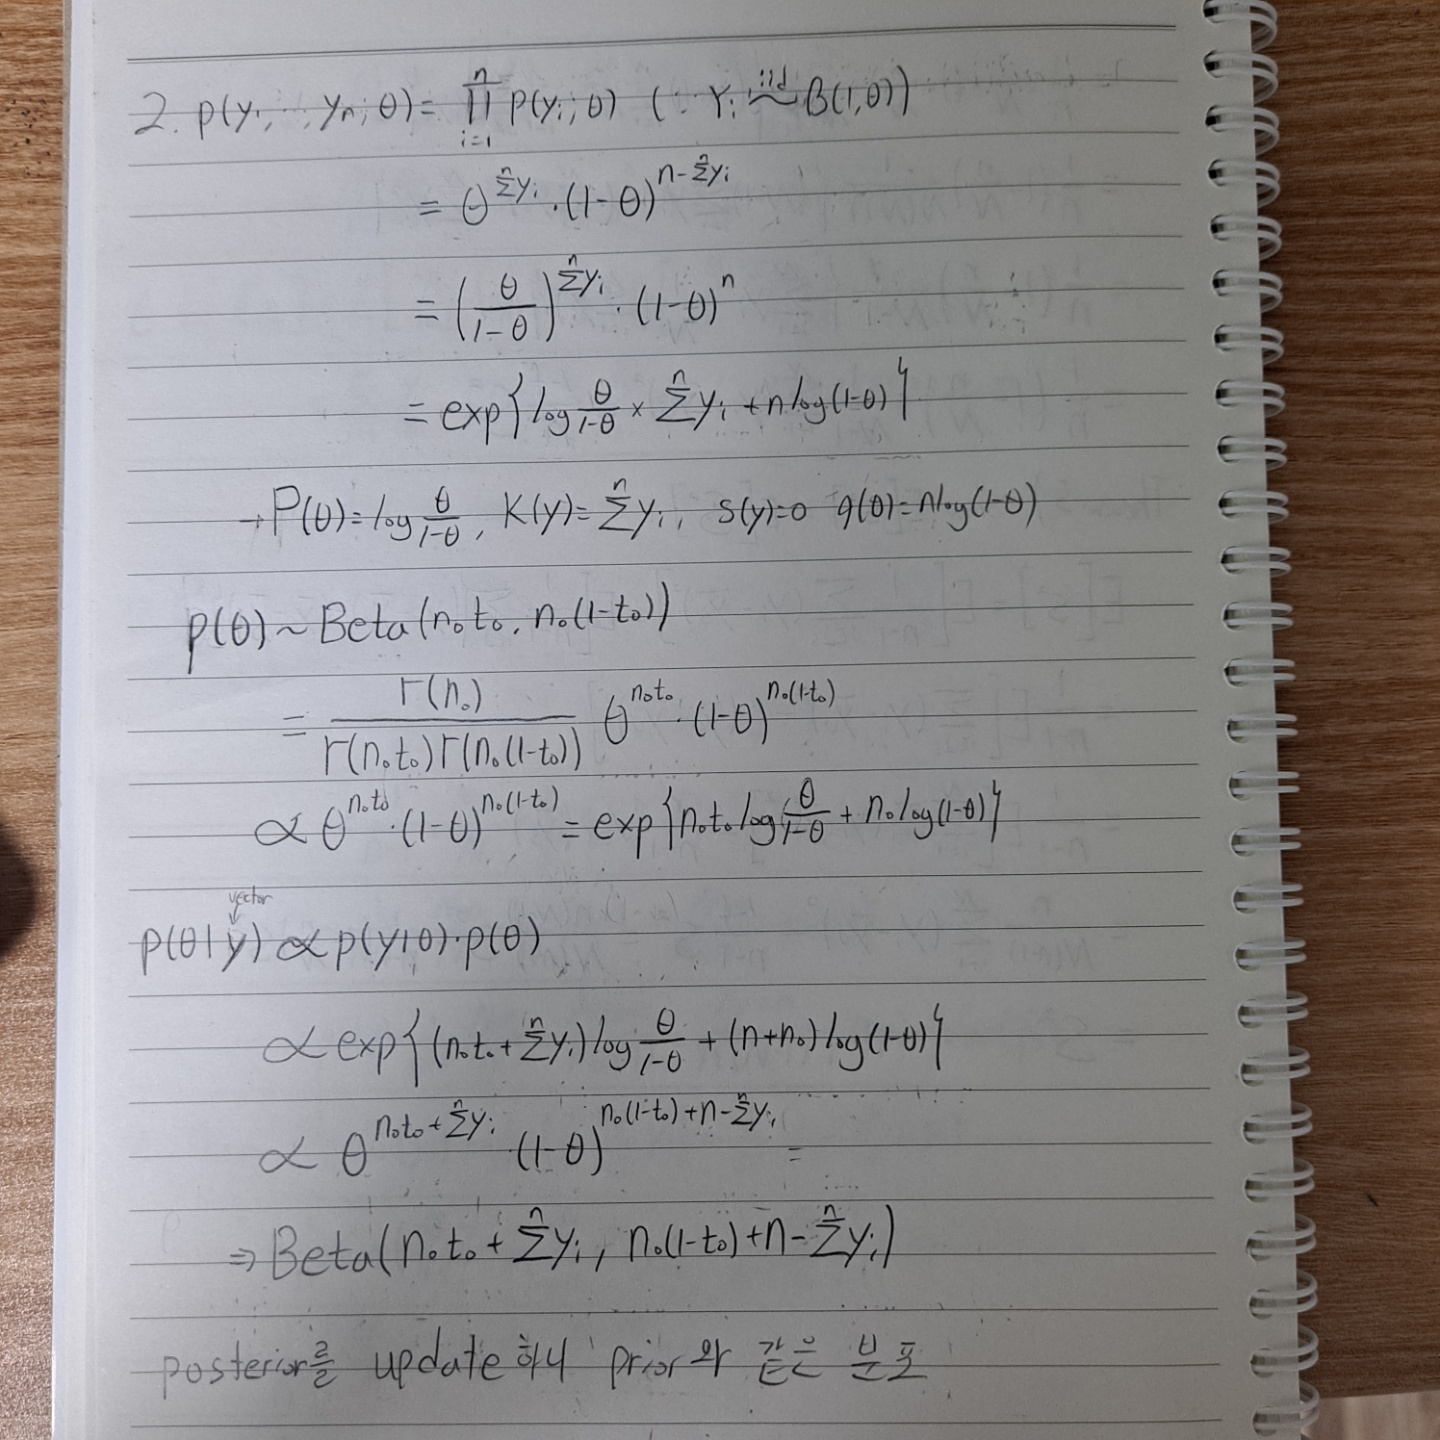

In [59]:
Image("./2주숙제1.jpg")

### 3

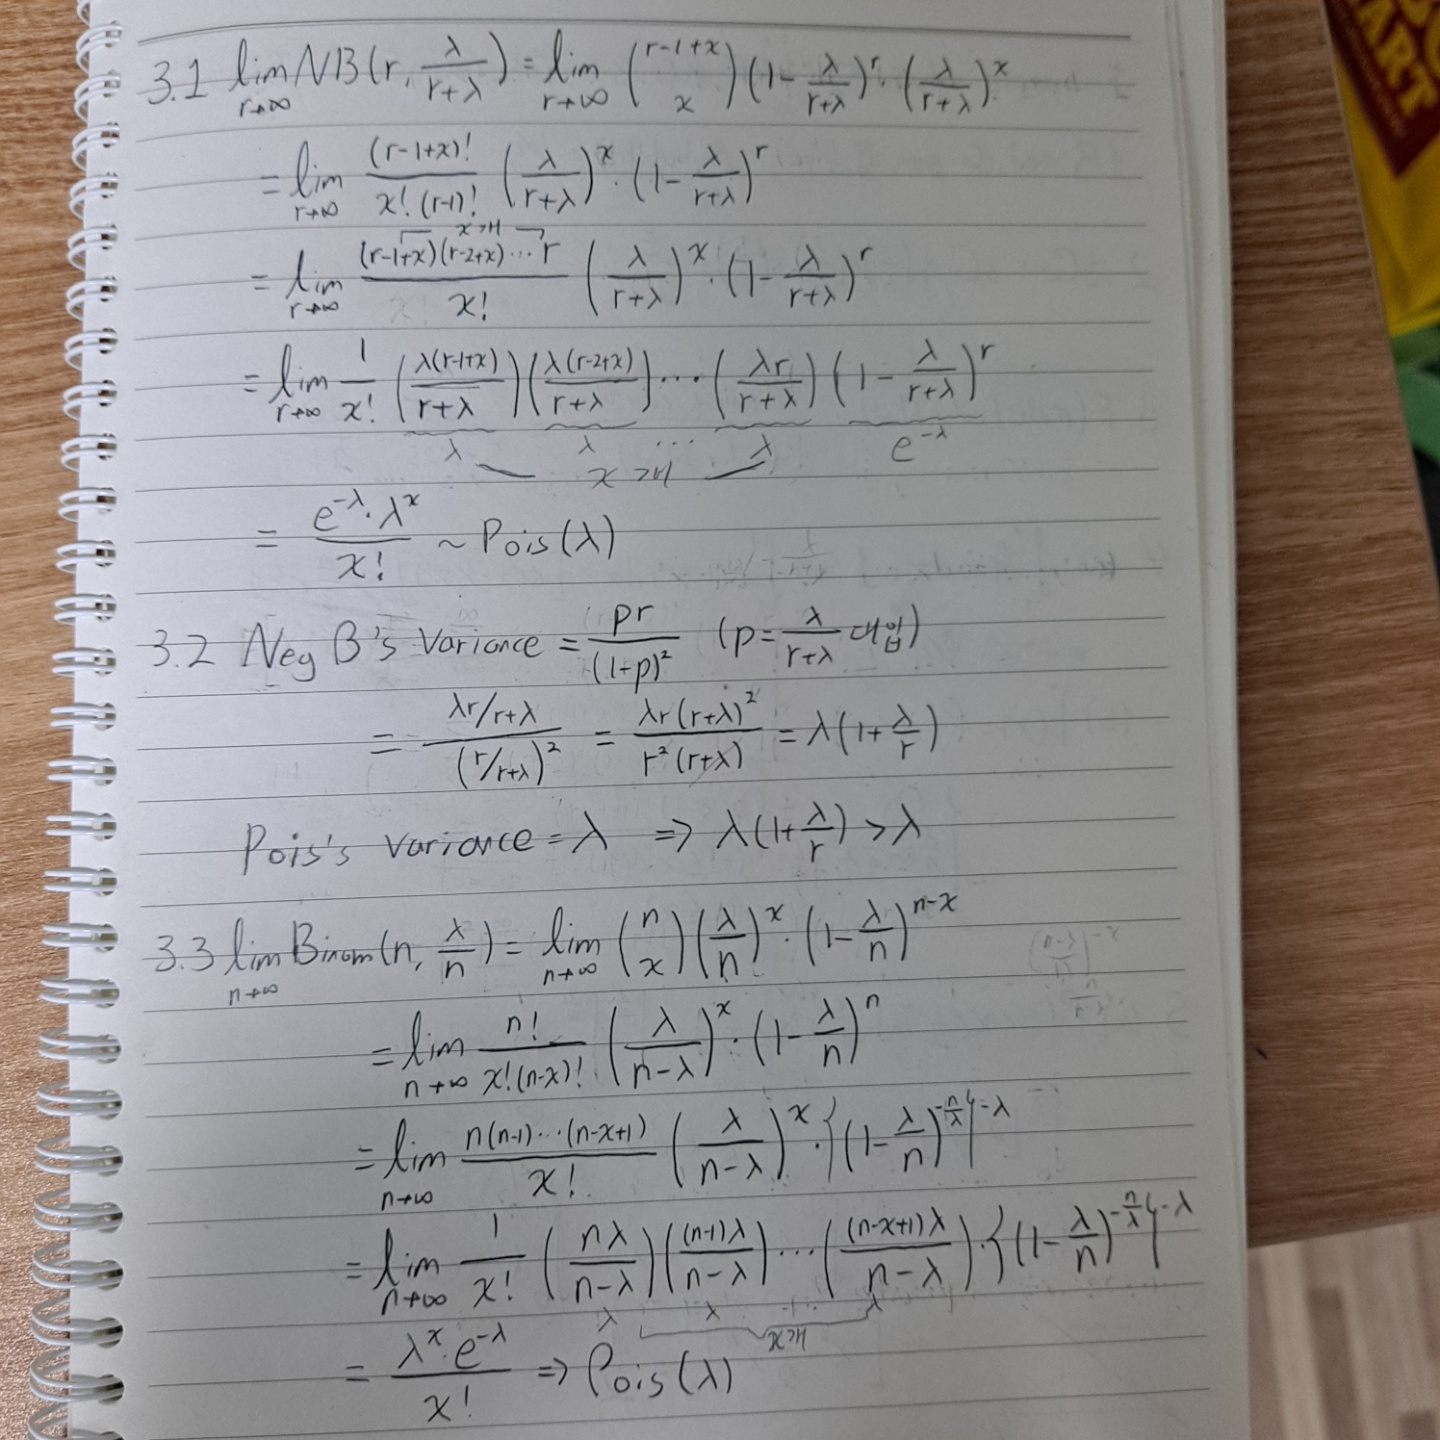

In [60]:
Image("./2주숙제2.jpg")